In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [3]:
dataset = pd.read_csv('Churn.csv')

In [4]:
dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [6]:
X = dataset.drop(columns='Exited')
y = dataset['Exited']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Logistic Regression
logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, y_train)
y_pred_logistic = logistic_clf.predict(X_test)

In [10]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [11]:
# Confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

Logistic Regression Evaluation:
Accuracy: 0.811
F1 Score: 0.3368421052631579
Precision: 0.5818181818181818
Recall: 0.23703703703703705


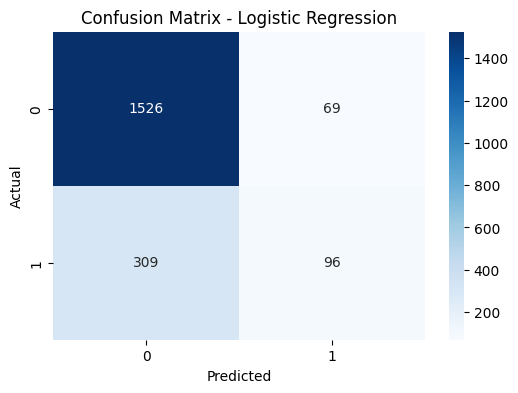

In [12]:
# Evaluation and Confusion Matrix for Logistic Regression
acc_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
prec_logistic = precision_score(y_test, y_pred_logistic)
rec_logistic = recall_score(y_test, y_pred_logistic)
print("Logistic Regression Evaluation:")
print("Accuracy:", acc_logistic)
print("F1 Score:", f1_logistic)
print("Precision:", prec_logistic)
print("Recall:", rec_logistic)
plot_confusion_matrix(y_test, y_pred_logistic, 'Confusion Matrix - Logistic Regression')


Random Forest Classifier Evaluation:
Accuracy: 0.867
F1 Score: 0.6133720930232558
Precision: 0.7455830388692579
Recall: 0.5209876543209877


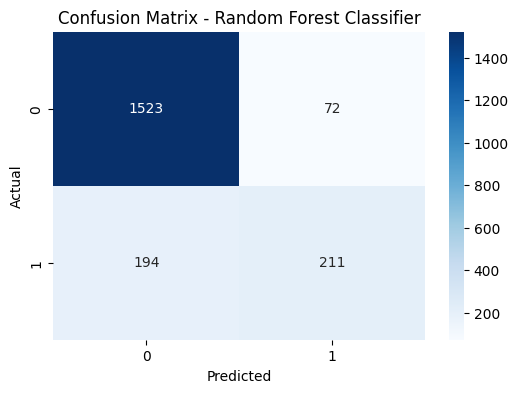

In [13]:
# Evaluation and Confusion Matrix for Random Forest Classifier
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", acc_rf)
print("F1 Score:", f1_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest Classifier')


In [14]:
# Testing with some examples
test_examples = [
    [[647, 40, 3, 85000.45, 2, 0, 1, 92012.45, 0, 1, 1]], 
    [[10, 90, 3, 90.45, 2, 0, 1, 1.45, 0, 1, 0]]          

In [15]:
# Predictions for logistic regression
print("\nLogistic Regression Predictions:")
for idx, example in enumerate(test_examples):
    pred_logistic = logistic_clf.predict(scaler.transform(example))
    print("Example {}: {}".format(idx+1, pred_logistic))


Logistic Regression Predictions:
Example 1: [0]
Example 2: [1]


C:\Users\Game4\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Game4\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
